In [71]:
from sklearn.datasets import load_iris
from keras.layers import Input, Dense
from keras.models import Model, Sequential

In [2]:
#Iris dataset has 3 classifications and each has 4 features
iris = load_iris()

In [4]:
print iris.data

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [60]:
# this is the size of our encoded representations
encoding_size = 2
encoding_dim = [32,16,8,encoding_size] 
input_size = 4
decoding_dim = [8,16,32,input_size]

# this is our input placeholder
input_img = Input(shape=(4,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim[0], activation='relu')(input_img)
encoded = Dense(encoding_dim[1], activation='relu')(encoded)
encoded = Dense(encoding_dim[2], activation='relu')(encoded)
encoded = Dense(encoding_dim[3], activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(decoding_dim[0], activation='relu')(encoded)
decoded = Dense(decoding_dim[1], activation='relu')(decoded)
decoded = Dense(decoding_dim[2], activation='sigmoid')(decoded)
decoded = Dense(decoding_dim[3], activation='relu')(decoded)

In [61]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [54]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [55]:
autoencoder.fit(iris.data, iris.data,epochs=500,batch_size=16,shuffle=True,validation_split=0.2)

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 0s - loss: 11.4157 - val_loss: 17.8899
Epoch 2/500
120/120 [==============================] - 0s - loss: 11.0250 - val_loss: 17.3670
Epoch 3/500
120/120 [==============================] - 0s - loss: 10.5923 - val_loss: 16.6943
Epoch 4/500
120/120 [==============================] - 0s - loss: 9.9290 - val_loss: 15.0860
Epoch 5/500
120/120 [==============================] - 0s - loss: 7.5025 - val_loss: 8.0102
Epoch 6/500
120/120 [==============================] - 0s - loss: 3.2806 - val_loss: 5.7068
Epoch 7/500
120/120 [==============================] - 0s - loss: 2.5392 - val_loss: 5.4214
Epoch 8/500
120/120 [==============================] - 0s - loss: 2.3652 - val_loss: 5.1769
Epoch 9/500
120/120 [==============================] - 0s - loss: 2.2388 - val_loss: 4.9677
Epoch 10/500
120/120 [==============================] - 0s - loss: 2.1331 - val_loss: 4.7665
Epoch 11/500
120/120 [=====

120/120 [==============================] - 0s - loss: 0.1561 - val_loss: 0.3624
Epoch 89/500
120/120 [==============================] - 0s - loss: 0.1547 - val_loss: 0.3477
Epoch 90/500
120/120 [==============================] - 0s - loss: 0.1528 - val_loss: 0.3270
Epoch 91/500
120/120 [==============================] - 0s - loss: 0.1497 - val_loss: 0.3398
Epoch 92/500
120/120 [==============================] - 0s - loss: 0.1504 - val_loss: 0.3225
Epoch 93/500
120/120 [==============================] - 0s - loss: 0.1457 - val_loss: 0.3076
Epoch 94/500
120/120 [==============================] - 0s - loss: 0.1456 - val_loss: 0.2887
Epoch 95/500
120/120 [==============================] - 0s - loss: 0.1428 - val_loss: 0.2737
Epoch 96/500
120/120 [==============================] - 0s - loss: 0.1410 - val_loss: 0.2827
Epoch 97/500
120/120 [==============================] - 0s - loss: 0.1383 - val_loss: 0.2631
Epoch 98/500
120/120 [==============================] - 0s - loss: 0.1387 - val_los

120/120 [==============================] - 0s - loss: 0.1005 - val_loss: 0.1533
Epoch 175/500
120/120 [==============================] - 0s - loss: 0.1024 - val_loss: 0.1557
Epoch 176/500
120/120 [==============================] - ETA: 0s - loss: 0.074 - 0s - loss: 0.1021 - val_loss: 0.1506
Epoch 177/500
120/120 [==============================] - 0s - loss: 0.0997 - val_loss: 0.1646
Epoch 178/500
120/120 [==============================] - 0s - loss: 0.1014 - val_loss: 0.1630
Epoch 179/500
120/120 [==============================] - 0s - loss: 0.1000 - val_loss: 0.1621
Epoch 180/500
120/120 [==============================] - 0s - loss: 0.1009 - val_loss: 0.1626
Epoch 181/500
120/120 [==============================] - 0s - loss: 0.0994 - val_loss: 0.1568
Epoch 182/500
120/120 [==============================] - 0s - loss: 0.0991 - val_loss: 0.1516
Epoch 183/500
120/120 [==============================] - 0s - loss: 0.1000 - val_loss: 0.1555
Epoch 184/500
120/120 [===========================

120/120 [==============================] - 0s - loss: 0.0922 - val_loss: 0.1353
Epoch 261/500
120/120 [==============================] - 0s - loss: 0.0919 - val_loss: 0.1319
Epoch 262/500
120/120 [==============================] - 0s - loss: 0.0911 - val_loss: 0.1403
Epoch 263/500
120/120 [==============================] - 0s - loss: 0.0914 - val_loss: 0.1341
Epoch 264/500
120/120 [==============================] - 0s - loss: 0.0914 - val_loss: 0.1335
Epoch 265/500
120/120 [==============================] - 0s - loss: 0.0914 - val_loss: 0.1336
Epoch 266/500
120/120 [==============================] - 0s - loss: 0.0935 - val_loss: 0.1389
Epoch 267/500
120/120 [==============================] - 0s - loss: 0.0908 - val_loss: 0.1398
Epoch 268/500
120/120 [==============================] - 0s - loss: 0.0914 - val_loss: 0.1394
Epoch 269/500
120/120 [==============================] - 0s - loss: 0.0913 - val_loss: 0.1359
Epoch 270/500
120/120 [==============================] - 0s - loss: 0.0903

120/120 [==============================] - 0s - loss: 0.0855 - val_loss: 0.1197
Epoch 347/500
120/120 [==============================] - 0s - loss: 0.0849 - val_loss: 0.1281
Epoch 348/500
120/120 [==============================] - 0s - loss: 0.0855 - val_loss: 0.1202
Epoch 349/500
120/120 [==============================] - 0s - loss: 0.0863 - val_loss: 0.1216
Epoch 350/500
120/120 [==============================] - 0s - loss: 0.0856 - val_loss: 0.1246
Epoch 351/500
120/120 [==============================] - 0s - loss: 0.0871 - val_loss: 0.1232
Epoch 352/500
120/120 [==============================] - 0s - loss: 0.0864 - val_loss: 0.1231
Epoch 353/500
120/120 [==============================] - 0s - loss: 0.0859 - val_loss: 0.1206
Epoch 354/500
120/120 [==============================] - 0s - loss: 0.0868 - val_loss: 0.1169
Epoch 355/500
120/120 [==============================] - 0s - loss: 0.0856 - val_loss: 0.1165
Epoch 356/500
120/120 [==============================] - 0s - loss: 0.0867

120/120 [==============================] - 0s - loss: 0.0808 - val_loss: 0.1173
Epoch 434/500
120/120 [==============================] - 0s - loss: 0.0806 - val_loss: 0.1136
Epoch 435/500
120/120 [==============================] - 0s - loss: 0.0807 - val_loss: 0.1100
Epoch 436/500
120/120 [==============================] - 0s - loss: 0.0803 - val_loss: 0.1124
Epoch 437/500
120/120 [==============================] - 0s - loss: 0.0804 - val_loss: 0.1106
Epoch 438/500
120/120 [==============================] - 0s - loss: 0.0805 - val_loss: 0.1197
Epoch 439/500
120/120 [==============================] - 0s - loss: 0.0803 - val_loss: 0.1162
Epoch 440/500
120/120 [==============================] - 0s - loss: 0.0807 - val_loss: 0.1120
Epoch 441/500
120/120 [==============================] - 0s - loss: 0.0799 - val_loss: 0.1130
Epoch 442/500
120/120 [==============================] - 0s - loss: 0.0803 - val_loss: 0.1087
Epoch 443/500
120/120 [==============================] - 0s - loss: 0.0802

In [95]:
encoded_data = encoder.predict(iris.data)
x=[]
y=[]
for i in range(encoded_data.shape[0]):
    x.append(encoded_data[i,0])
    y.append(encoded_data[i,1])

In [87]:
import matplotlib.pyplot as plt

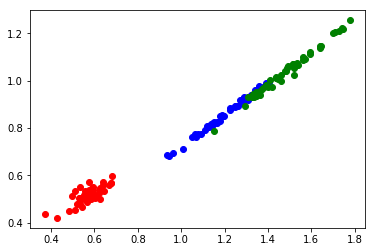

In [98]:
plt.figure()
plt.plot(x[0:49],y[0:49],'ro',x[50:99],y[50:99],'bo',x[100:149],y[100:149],'go')
plt.show()